In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
train_idx = np.zeros(12)
validate = np.ones(4)
sample_idx = np.concatenate([train_idx,validate])
np.random.shuffle(sample_idx)

In [47]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
left_rest_scores = []
left_rest_val = []
i = 0 
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        for file in os.listdir(dr):
            if 'scores_csp_left_right' in str(file) :
                scr = np.load(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                if sample_idx[i]:
                    print(str(dr).split("'")[1])    
                    left_rest_val.append(np.load(str(dr).split("'")[1]+'/val_csp_left_right.npy'))
                else :
                    left_rest_scores.append(scr)
                i+=1
left_rest_val.append(np.load('ysf/val_csp_left_right.npy'))

ah
mni
msf
sby


In [48]:
subjets = np.array(left_rest_scores).shape[0]
scores = np.concatenate(left_rest_scores,axis=3)

In [49]:
freqs = [2.,7.,18.,35.,60.,90.,110.,120.,140]
freq_tags = [
    '2-7Hz','7-18','18-35','35-60','60-90','90-110','110-120','120-140']
freq_ranges = list(zip(freqs[:-1], freqs[1:]))
time_config = [
    (1,0.2,1000,0),
    (3,0.2,300,0),
    (3,0.4,500,200),
    (3,0.4,400,200),
    (3,0.4,300,100),
]
components = [4,8]

In [50]:
medians = []
i = 0
for cnf in time_config:
    j = 0
    median = []
    for cmp in components:
        data = np.apply_along_axis(np.median, 1 ,scores[j,i].reshape(len(freq_tags),subjets,12))
        median.append(data)
        j += 1
    medians.append(median)
    i += 1

In [51]:
medians = np.array(medians).transpose(1,0,2,3)

In [56]:
print(np.array(left_res_val[0]).shape)
print(val_medians.shape)

(2, 3, 7, 12)
(2, 3, 7, 12)


In [52]:
val_freqs = [2.,7.,18.,35.,60.,90,110.,120.]
val_freq_ranges = list(zip(val_freqs[:-1], val_freqs[1:]))
scores = []
val_time_config = [
    (1,0.2,1000,0),
    (3,0.2,300,0),
    (3,0.4,400,200),
]
components = [4,8]
val_medians = []
i = 0
scores = np.concatenate(left_rest_val,axis=3)
for cnf in val_time_config:
    j = 0
    median = []
    for cmp in components:
        data = np.apply_along_axis(np.median, 1 ,scores[j,i].reshape(len(val_freq_ranges),5,12))
        median.append(data)
        j += 1
    val_medians.append(median)
    i += 1
val_medians = np.array(val_medians).transpose(1,0,2,3)

1:avg pwr 2:autocorr 3:centroid 4:mean abs diff 5:med abs diff 6:slope 
7:scptr dist 8:fft mean coeff 9:entropy 10:mel coeff 11:cwt mean 12:cwt std 


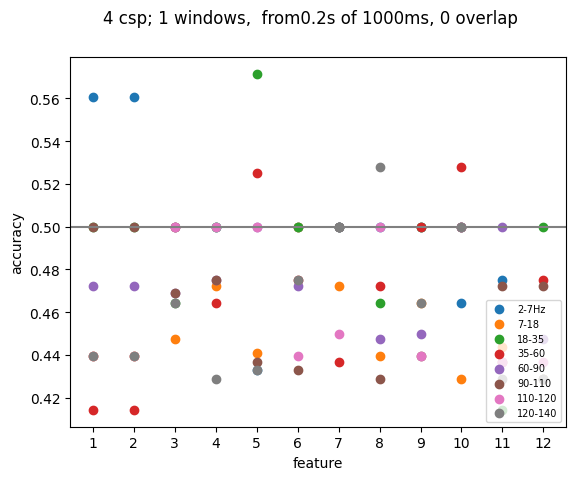

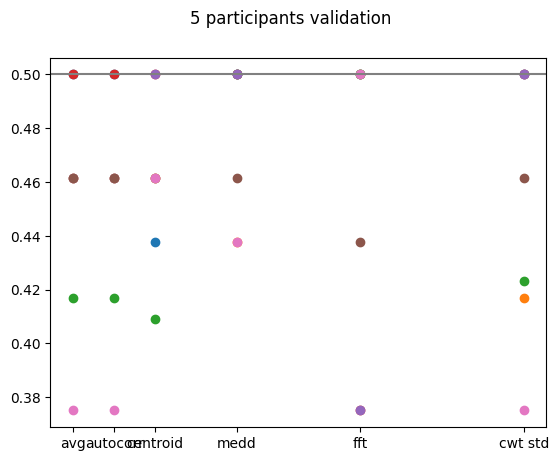

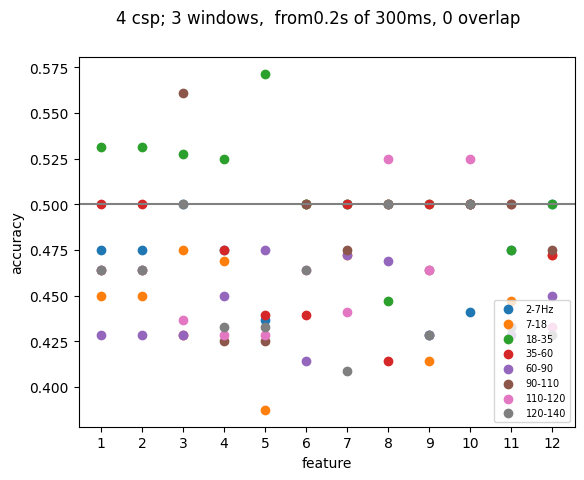

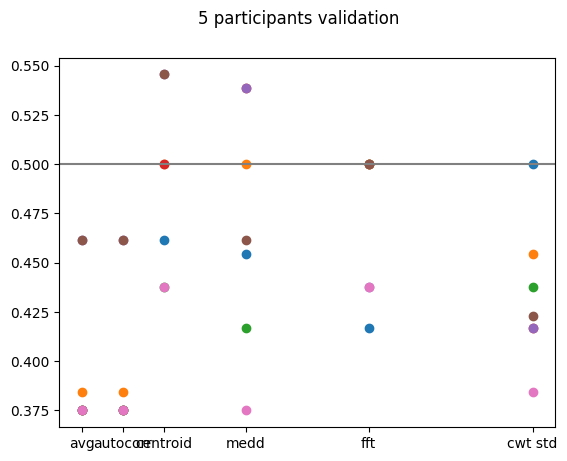

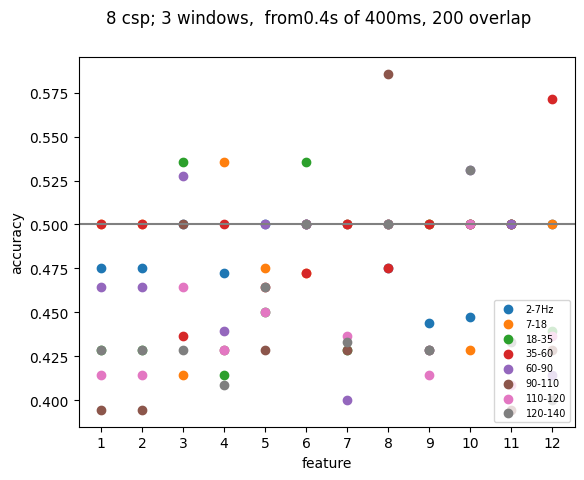

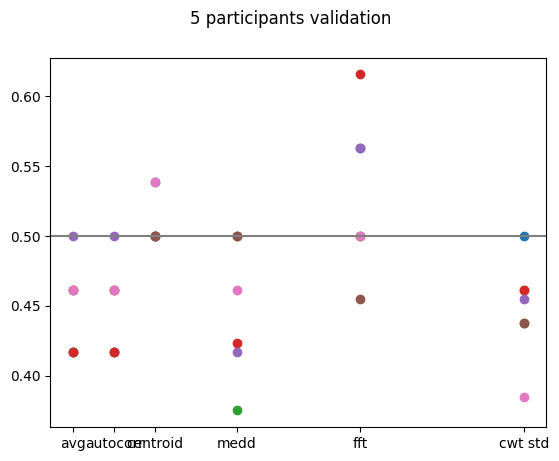

In [64]:
val_freq_tags = ['2-7Hz','7-18Hz','18-35Hz','35-60Hz','60-90Hz','90-110','110-120']
freq_colors = ['royalblue','orange','green']
features = [1,2,3,4,5,6,7,8,9,10,11,12]
features_of_i = [True,True,True,False,True,False,False,True,False,False,False,True]
i=0
i_v=0
left_res_val = np.array(left_res_val)
for cmp in medians: 
    j = 0
    for cnf in cmp:
        n_windows, t_min, width, overlap = time_config[j]
        if np.max(cnf) > 0.57:
            csp_fig, axes = plt.subplots(1)
            csp_fig.suptitle('{} csp; {} windows,  from{}s of {}ms, {} overlap'.format(components[i],n_windows,t_min,width,overlap))
            for f,freq in enumerate(freq_tags):
                axes.scatter(features, np.array(cnf)[f,:])
            axes.axhline(.5, c='grey')
            axes.legend(freq_tags, loc='lower right', prop={'size':7})
            axes.set_xticks(features)
            axes.set_xlabel('feature')
            axes.set_ylabel('accuracy')
            val_fig, axes = plt.subplots(1)
            for f,freq in enumerate(val_freq_tags):
                axes.scatter(np.array(features)[features_of_i], val_medians[i,i_v,f,features_of_i])
            axes.axhline(.5, c='grey')
            axes.set_xticks([1,2,3,5,8,12])
            axes.set_xticklabels(['avg','autocorr','centroid','medd','fft','cwt std'])
            val_fig.suptitle('5 participants validation')
            leg = axes.get_legend()
            i_v += 1
        j+=1
        
    i+=1
print('1:avg pwr 2:autocorr 3:centroid 4:mean abs diff 5:med abs diff 6:slope ')
print('7:scptr dist 8:fft mean coeff 9:entropy 10:mel coeff 11:cwt mean 12:cwt std ')